In [6]:
import os

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
!unzip gdrive/MyDrive/horse-or-human.zip

Archive:  gdrive/MyDrive/horse-or-human.zip
replace horses/horse01-0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
train_horse_dir = os.path.join('horses')
train_human_dir = os.path.join('humans')

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

['horse02-5.png', 'horse29-7.png', 'horse10-4.png', 'horse28-3.png', 'horse47-1.png', 'horse39-2.png', 'horse06-5.png', 'horse47-9.png', 'horse14-1.png', 'horse26-2.png']


In [10]:
nNyNtrain_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['human01-30.png', 'human12-09.png', 'human03-19.png', 'human17-24.png', 'human06-00.png', 'human15-09.png', 'human07-27.png', 'human01-01.png', 'human12-23.png', 'human06-13.png']


In [11]:
print(len(os.listdir(train_horse_dir)))
print(len(os.listdir(train_human_dir)))

500
527


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

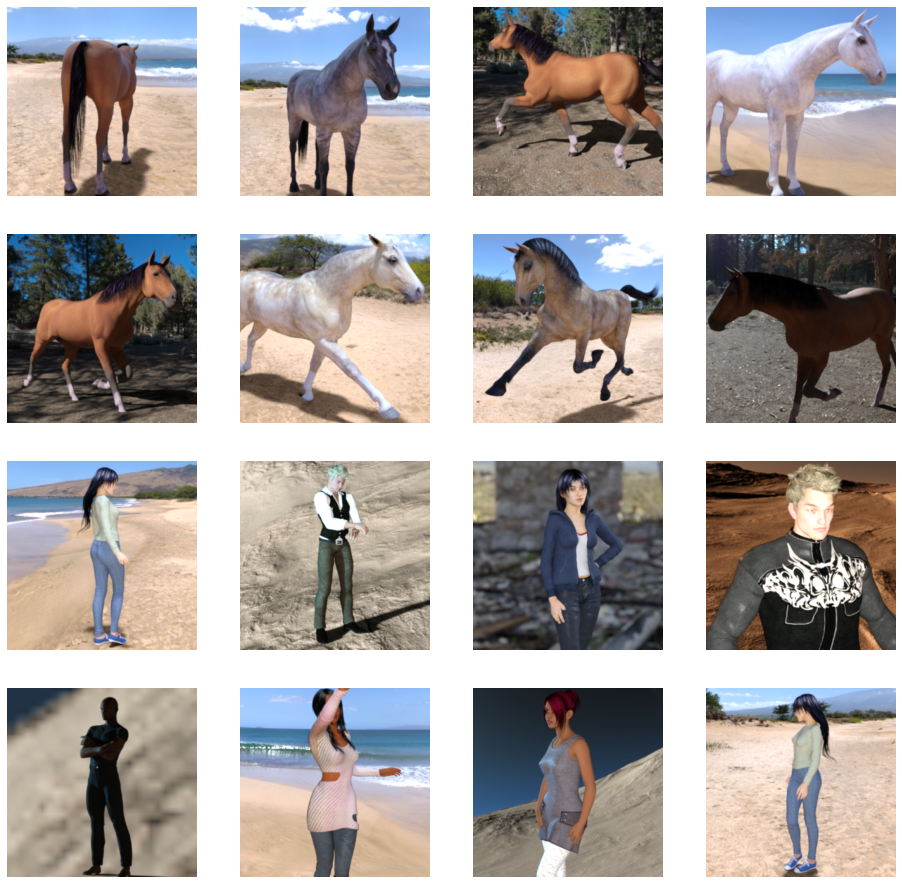

In [13]:
nrows=4
ncols=4
pic_index=0

fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index += 8

next_horse_pix = [os.path.join(train_horse_dir,fname)
                  for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir,fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

for i,img_path in enumerate(next_horse_pix+next_human_pix):
    sp=plt.subplot(nrows,ncols,i+1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()    

In [14]:
import tensorflow as tf
from tensorflow import keras

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [17]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss="binary_crossentropy",optimizer=RMSprop(learning_rate=0.001),metrics=["accuracy"])

In [18]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    './horseorhuman/',
    target_size=(300,300),
    batch_size=128,
    class_mode="binary")

Found 1027 images belonging to 2 classes.


In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 52s 6s/step - loss: 1.1842 - accuracy: 0.5595
Epoch 2/15
8/8 [==============================] - 61s 8s/step - loss: 0.6597 - accuracy: 0.6367
Epoch 3/15
8/8 [==============================] - 52s 6s/step - loss: 0.5076 - accuracy: 0.7853
Epoch 4/15
8/8 [==============================] - 51s 6s/step - loss: 0.5024 - accuracy: 0.7887
Epoch 5/15
8/8 [==============================] - 52s 6s/step - loss: 0.2300 - accuracy: 0.9333
Epoch 6/15
8/8 [==============================] - 51s 6s/step - loss: 0.2151 - accuracy: 0.9232
Epoch 7/15
8/8 [==============================] - 50s 7s/step - loss: 0.2303 - accuracy: 0.9132
Epoch 8/15
8/8 [==============================] - 53s 6s/step - loss: 0.2135 - accuracy: 0.9344
Epoch 9/15
8/8 [==============================] - 51s 6s/step - loss: 0.0574 - accuracy: 0.9811
Epoch 10/15
8/8 [==============================] - 59s 7s/step - loss: 0.4978 - accuracy: 0.8643
Epoch 11/15
8/8 [======================

In [22]:
import keras.utils as image

In [25]:
#from keras.preprocessing import image
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
    path = '/content/'+ fn
    img = image.load_img(path,target_size=(300,300))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    classes=model.predict(images,batch_size=10)
    print(classes[0])
    if(classes[0]>0.5):
        print(fn + " is a human")
    else:
        print(fn + " is a horse")
              

Saving girl1.jpg to girl1.jpg
1/1 [==============================] - 0s 35ms/step
[1.]
girl1.jpg is a human
